CPU動作可能

# モデル読み込み

In [ ]:
from transformers import AutoProcessor, AutoModelForImageTextToText

model_id = "LiquidAI/LFM2-VL-450M"
# model_id = "LiquidAI/LFM2-VL-1.6B"

model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype="bfloat16",
    trust_remote_code=True
)
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

# 画像推論

In [ ]:
# サンプル画像ダウンロード
!wget https://raw.githubusercontent.com/Kazuhito00/GLM-4.1V-9B-Thinking-Colaboratory-Sample/refs/heads/main/sample.jpg -O sample.jpg

--2025-08-21 02:57:41--  https://raw.githubusercontent.com/Kazuhito00/GLM-4.1V-9B-Thinking-Colaboratory-Sample/refs/heads/main/sample.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80737 (79K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  78.84K  --.-KB/s    in 0.02s   

2025-08-21 02:57:41 (3.30 MB/s) - ‘sample.jpg’ saved [80737/80737]



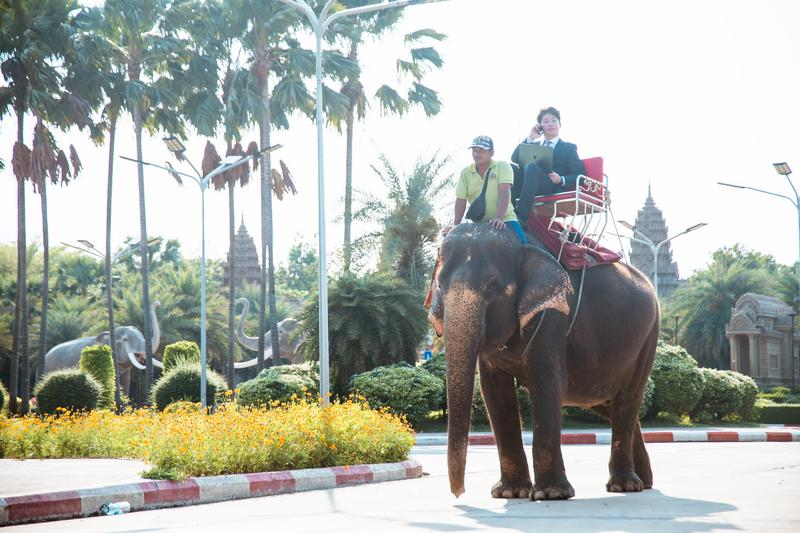

In [ ]:
import cv2
from PIL import Image

cv_image = cv2.imread('sample.jpg')
rgb_image = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(rgb_image)
pil_image

In [ ]:
%%time

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": pil_image
            },
            {
                "type": "text",
                "text": "describe this image"
            }
        ],
    }
]

inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True,
    tokenize=True,
    min_image_tokens=64,     # 推奨パラメータ
    max_image_tokens=256,    # 推奨パラメータ
    do_image_splitting=True  # 推奨パラメータ
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=1024,
    do_sample=True,          # 推奨パラメータ
    temperature=0.1,         # 推奨パラメータ
    min_p=0.15,              # 推奨パラメータ
    repetition_penalty=1.05  # 推奨パラメータ
)
output_text = processor.batch_decode(outputs, skip_special_tokens=True)[0]

CPU times: user 1min 27s, sys: 133 ms, total: 1min 27s
Wall time: 22.5 s


In [ ]:
print(output_text)

user
describe this image
assistant
This image captures a fascinating scene of elephant tourism in Thailand. Two people are riding on the back of a majestic gray elephant, which is walking along a road. The elephant's trunk is raised, and its ears are flapping, giving it an alert appearance.

The riders are dressed in colorful clothing - one person wears a yellow shirt and blue pants, while the other sports a black shirt with red pants. They're seated in a red and white basket-like seat attached to the elephant's back.

The setting is quite picturesque. In the background, there's a large temple with a pointed roof, surrounded by lush green trees and bushes. A tall streetlight stands nearby, and a gray elephant can be seen in the distance.

The scene is bathed in bright sunlight, creating a vibrant and lively atmosphere. The sky is clear and blue, enhancing the overall beauty of the image.

This photograph beautifully showcases the unique experience of elephant rides in Thailand, blendin

# 日本語推論確認

In [ ]:
%%time

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
                "image": pil_image
            },
            {
                "type": "text",
                "text": "この画像を説明して"
            }
        ],
    }
]



inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt",
    return_dict=True,
    tokenize=True,
    min_image_tokens=64,     # 推奨パラメータ
    max_image_tokens=256,    # 推奨パラメータ
    do_image_splitting=True  # 推奨パラメータ
).to(model.device)

outputs = model.generate(
    **inputs,
    max_new_tokens=1024,
    do_sample=True,          # 推奨パラメータ
    temperature=0.1,         # 推奨パラメータ
    min_p=0.15,              # 推奨パラメータ
    repetition_penalty=1.05  # 推奨パラメータ
)

output_text = processor.batch_decode(outputs, skip_special_tokens=True)[0]

CPU times: user 1min 6s, sys: 38.8 ms, total: 1min 6s
Wall time: 16.6 s


In [ ]:
print(output_text)

user
この画像を説明して
assistant
この画像は、動物と人間の活動の融合を示しています。動物は、特に大象が、しばしば人々を運ぶために使用されます。人々は、動物に乗るために、安全で快適な方法を確保するために、安全装備や制御器具を持っています。背景では、動物が動物園や動物园で一般的に見られる場所で、動物が人々を運ぶことがよくあります。背景には、動物園の建築物や植生が含まれており、動物が動物園の環境内で動物と人間の交流を促進する役割を果たしていることを示唆しています。
